In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
crime=pd.read_csv("/content/sample_data/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
#lets rename column 1 as place name
crime.rename({'Unnamed: 0':'Place'},axis=1,inplace=True)

In [ ]:
#EDA
crime_new=crime.iloc[:,1:]
crime_new.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
crime_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [ ]:
crime_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [ ]:
def norm_fun(val):
  return (val-val.min())/(val.max()-val.min())

In [ ]:
#lets normalise the hetergenous data
crime_norm=norm_fun(crime_new)
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


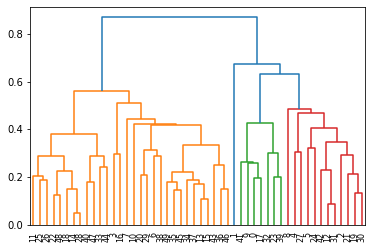

In [ ]:
dendogram=sch.dendrogram(sch.linkage(crime_norm,method='average'))

In [ ]:
#create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
y_hc=hc.fit_predict(crime_norm)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
crime_new['cluster_id']=y_hc
crime_new.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


In [ ]:
#lets re look the data after Hierarchical clustering
crime['cluster_id']=y_hc
crime.head()


,Place,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [ ]:
df_clust=crime_new.groupby('cluster_id').mean()
df_clust

,Murder,Assault,UrbanPop,Rape
cluster_id,,,,
0,12.278947,254.842105,69.473684,28.357895
1,4.870000,114.433333,63.633333,15.943333
2,10.000000,263.000000,48.000000,44.500000


# KMEANS

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
crime_kmeans=pd.read_csv("/content/sample_data/crime_data.csv")
crime_kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime_data=crime_kmeans.drop(['Unnamed: 0'],axis=1)
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
crime1=norm_fun(crime_data)
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [ ]:
#lets do kmeans clustering and store the wcss value for elbow plot
wss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i)
  k_means.fit(crime1)
  wss.append(k_means.inertia_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

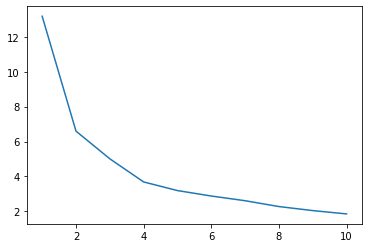

In [ ]:
#elbow plot
plt.plot(range(1,11),wss)

In [ ]:
#lets check clustering for 3 and 4 value
k_means=KMeans(n_clusters=3)
k_means.fit(crime1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
print("silSilhouette_score {}".format(silhouette_score(crime1,k_means.labels_)))

silSilhouette_score 0.3187755079997931


In [ ]:
k_means=KMeans(n_clusters=4)
k_means.fit(crime1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
print("silSilhouette_score {}".format(silhouette_score(crime1,k_means.labels_)))

silSilhouette_score 0.3408903560074363


In [ ]:
#selecting cluster = 4 checking for silhouette_samples
sil_width = silhouette_samples(crime1,k_means.labels_)
crime_data["sil_width"] = sil_width
crime_data["cluster_id"] = k_means.labels_
crime_data.head(4)

,Murder,Assault,UrbanPop,Rape,sil_width,cluster_id
0,13.2,236,58,21.2,0.471421,3
1,10.0,263,48,44.5,0.057532,2
2,8.1,294,80,31.0,0.432455,2
3,8.8,190,50,19.5,0.067806,3


In [ ]:
df_clust=crime_data.groupby('cluster_id').mean()
df_clust

,Murder,Assault,UrbanPop,Rape,sil_width
cluster_id,,,,,
0,5.852941,141.176471,73.647059,19.335294,0.322478
1,3.600000,78.538462,52.076923,12.176923,0.384975
2,10.966667,264.000000,76.500000,33.608333,0.299389
3,13.937500,243.625000,53.750000,21.412500,0.370631


# DBSCAN

In [ ]:
crime=pd.read_csv("/content/sample_data/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime_new=crime.drop(['Unnamed: 0'],axis=1)
crime_new.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
crime_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [ ]:
crime_val=crime_new.values
crime_val

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [ ]:
stscaler=StandardScaler().fit(crime_val)
x=stscaler.transform(crime_val)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#lets start creating clustering with defining eps and min point
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#-1 indicates noisy data
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
crime_new['cluster_id']=dbscan.labels_
crime_new

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [ ]:
df_clust = crime_new.groupby('cluster_id').mean()
df_clust

,Murder,Assault,UrbanPop,Rape
cluster_id,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143
